[Table of Contents](table_of_contents.ipynb)

# Topic 6.  Projection Operators

Authors: Sequoia Ploeg & Alexander Petrie     
Email: sequoiap4@gmail.com, alexander.petrie@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

##  Introduction

A **projection** is a mapping of some space onto a subspace of the original space. A **projection operator** is a linear operator P that maps a space to the subspace. A **projection matrix** is an $n \times n$ square matrix that maps from $\mathbb{R}^n$ to a subspace $W$.

In order for an operator to be a projection operator, it must be idempotent, i.e. $P^2 = P$. This means that whenever P is applied twice to any value, it gives the same result as if it were applied just once.

There are two kinds of projections:
* **Orthogonal:** A projection is an orthogonal projection if its range and nullspace are orthogonal. Another test is if $P^T = P$ for real matrices; $P^H = P$ for complex ones. Calculating least squares regressions require orthogonal projections.
* **Oblique:** Non-orthogonal projections are still valid projections, i.e. $P^2 = P$, as will be shown later.

One example of a projection is mapping a 3D object onto a 2D subspace. This is done in video games. The graphics are often generated in a 3D environment and they are then projected onto a 2D screen so we can see them. 

##  Explanation of the theory
Let $W$ be a finite dimentional vector space and $P$ be a projection on $W$. Suppose the subspaces $U$ avnd $V$ are the range and null space of $P$, respectively. 

### Properties of a projection operator
* $P^2 = P$ ($P$ is *idempotent*)
    * This means that if you use $P$ to try to operate on a value that has already been operated on by $P$, the value will not change.      
    
    
* $\forall \, x \in U \, \colon \, Px = x$
    * This means that if $P$ operates on some value in the range space of $P$, that value does not change.
    
    
* There is a direct sum $W = U \bigoplus V$. Every vector x in $W$ my be decomposed as $x = u + v$ where $u$ is in range of $P$ and $v$ is in the null space of $P$
    * In other words: if $P\,\colon\;W\rightarrow W$, then $W = \mathcal{R}(P) + \mathcal{N}(P)$
    
    
* The range and null space of a projection are complementary, meaning they are disjoint.


* If $P$ is a projection, $(I - P)$ is also a projection.
    * Proof: 
    $$
    \begin{split}
        (I-P)^2 &= (I-P)(I-P) \\
        &= I-P-P+P^2 \\
        &= I - P - P + P \\
        &= I-P \\
    \end{split}
    $$
    
    
* $P$ projects onto the range space $U$.  $(I-P)$ projects onto the null space $V$.

### Orthogonal projections
When $U$ (range space of $P$) and $V$ (null space of $P$) are orthogonal subspaces (i.e., $\mathcal{R}(P)\, \bot\,\mathcal{N}(P)$), $P$ is an **orthogonal projection**. Orthogonal projections are very useful because if you can orthgonally project a value onto a subspace, that projection is the closest representation of the value on that subspace (see engineering example at the end). 

Two subspaces are orthogonal if for $\forall u \in U$, $\forall v \in V \implies \langle u, v \rangle = 0$.

## Simple Numerical Example

### Example 1

This first example is an orthogonal projection of a vector in $\mathbb{R}^2$ to the line y = 0. It orthogonally projects all points in $\mathbb{R}^2$ to this line, meaning the result of the projection is the closest point on the line $y=0$ to the initial point. The "physical" intuition would be that, for any point in $\mathbb{R}^2$, the closest point to the line $y=0$ is found by dropping a vertical line from that point to the x-axis. Therefore, in this example, the projection matrix simply "selects" out the x-component of the vector representing that point, discarding the y-component.

The projection matrix is:
$$
   P=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right]
$$

We can verify it is a projection by computing $P^2$ and showing it is equal to $P$:

$$
  P^2 = P \cdot P = \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right] \cdot \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 \cdot 1 + 0 \cdot 0 & 1 \cdot 0 + 0 \cdot 0 \\
   0 \cdot 1 + 0 \cdot 0 & 0 \cdot 0 + 0 \cdot 0 \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right]
$$

The code below plots the projection of ten randomly generated $(x,y)$ coordinate pairs onto the line $y=0$.

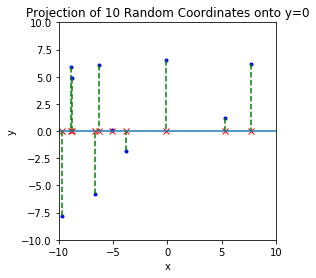

In [2]:
x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[1, 0],
              [0, 0]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[0,0])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=0")
plt.show()

### Example 2

This example is similar to the first in that it maps all points in $\mathbb{R}^2$ to a line. However, now the line is y = x. 
The projection matrix in this case is: 

$$
   P=
  \left[ {\begin{array}{cc}
   0.5 & 0.5 \\
   0.5 & 0.5 \\
  \end{array} } \right]
$$    
You can change the x and y points in the code and it will show how they project onto the line y = x.

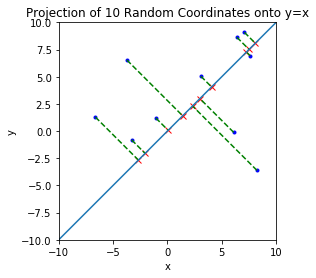

In [3]:
x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[0.5, 0.5],
              [0.5, 0.5]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=x")
plt.show()

### Example 3

In this third example, we again project onto the line $y=0$ but in some direction defined by a variable $\alpha$. This creates an oblique projection. The projection matrix is

$$
P=
  \left[ {\begin{array}{cc}
   1 & \alpha \\
   0 & 0 \\
  \end{array} } \right]
$$

We can prove this is an operator by showing that $P^2 = P$:

$$
P^2 = P \cdot P =
  \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
  \cdot \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
  = \left[ {\begin{array}{cc}
   0 \cdot 0 + 0 \cdot \alpha & 0 \cdot 0 + 0 \cdot 1 \\
   \alpha \cdot 0 + 1 \cdot \alpha & \alpha \cdot 0 + 1 \cdot 1 \\
  \end{array} } \right]
  = \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
$$

The projection is an orthgonal projection only if $\alpha = 0$.

In the code sample below, you can play with the parameter ``a`` to see how it affects the direction of projection.

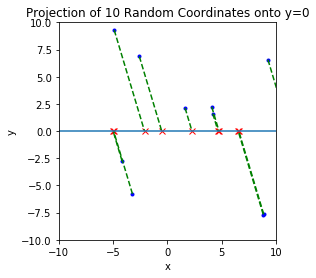

In [4]:
a = 0.3

x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[1, a],
              [0, 0]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[0,0])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=0")
plt.show()

## An Engineering Application

### Example 1: Nearest point projection

If we are given a point $x \in S$, suppose that we would like to approximate $x$ with a point in $V \subset S$. Assuming that $x \notin V$, we need to find the point in $V$ that is closest to $x$; that is, $\hat{x}$. This point is given by the orthogonal projection of $x$ onto $V$. 

In this example, let $V$ be the plane in $\mathbb{R}^3$ spanned by the vectors 

$$
y = 
    \left[ {\begin{array}{c}
    1  \\
    0  \\
    1  \\
    \end{array} } \right]
\textrm{and }
z =
    \left[ {\begin{array}{c}
    0 \\
    1 \\
    1 \\
    \end{array} } \right]
$$.

If 

$$
A=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
   1 & 1 \\
  \end{array} } \right]
$$

then the projection matrix that projects points in $\mathbb{R}^3$ orthogonally onto the plane spanned by $y$ and $z$ is described by $P = A(A^HA)^{-1}A^H$. Note that the columns of $A$ are the vectors that span $V$. In the python code below, we project the vector 

$$
  q =\left[ {\begin{array}{c}
   7 \\
    8 \\
    9 \\
  \end{array} } \right]
$$

onto the plane $V = span(y,z)$, and get 

$$
  \hat{x} = Pq =\left[ {\begin{array}{c}
   5 \\
    6 \\
    11 \\
  \end{array} } \right]
$$.

This vector is the closest approximation of $q$ on $V$.

In [5]:
A = np.array([[1, 0],
              [0, 1],
              [1, 1]])

P = A @ np.linalg.inv(A.conj().T @ A) @ A.conj().T
print('Projection matrix:')
print(P, "\n")

q = np.array([[7],
              [8],
              [9]])
Pq = P @ q
print('Closest approximation in V:')
print(Pq)

Projection matrix:
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]] 

Closest approximation in V:
[[  5.]
 [  6.]
 [ 11.]]


### Example 2: Representing 3D space in 2D

Suppose we want to represent a 3D coordinate axis on a screen. This is the most general case of rendering any 3D object on a computer screen; if we can represent the coordinate axis, then we can represent any object which we might place within that Euclidean space. Consider 3D plots generated by a program such as MATLAB or Matplotlib; what we see as a good 3D representation of a line or surface is simply a projection onto a 2D surface: your computer screen. So instead of relying on the plotting library to figure that out for us--what if we tried to calculate where the projection would fall ourselves?

Suppose we have $x = y = z = \{0, 1, 2, 3, 4, 5\}$ and we want to plot $(x, 0, 0), (0, y, 0), (0, 0, z)$ for all values of $x, y, z$ in their respective sets. This is, of course, simply the first five points all the coordinate axis in each direction. Suppose we project onto an observation plane that is 10 units from the origin. The plane will be defined by a vector $\vec{r} = (r, \phi, \theta)$ from the origin, where $r$ is the magnitude of the vector, $\phi$ is the angle from $x$ towards $y$ in the $x-y$ plane, and $\theta$ is the angle measured from $z$, which points directly upwards.

<img src="files/3d_coordinate_axis.jpg" width="300" />

In [6]:
# Manipulation parameters (angles in degrees)
theta = 45 # Between {0, 90deg}
phi = 45 # Between {0, 90deg}
r = 10

There are two ways we could approach this problem.

1. Draw a line from the starting point to the plane in the direction of the plane's normal vector and see where it intersects.

2. Find the projection to a space *orthogonal* to the plane of interest, $W$, and then find $I-W$ which is the projection onto the plane (since the range and null space of a projection are disjoint).

Let's demonstrate both methods with code examples.

#### Approach 1

First, we'll see where a vector from the point of interest in the direction of the plane's normal vector intersects the plane.

Our normal unit vector can be defined as $\hat{n} 
= \left\langle \frac{r \sin \theta \cos \phi}{\| \vec{r} \|}, \frac{r \sin \theta \sin \phi}{\| \vec{r} \|}, \frac{r \cos \theta}{\| \vec{r} \|} \right\rangle 
= \langle \sin \theta \cos \phi, \sin \theta \sin \phi, \cos \theta \rangle$.

We can write a parametric equation for a line from any point $(x, y, z) \in \mathbb{R}^3$ in the direction of $\hat{n}$ parameterized by $t$. The form of that equation is

$$
X(t) = \left( x + t \sin \theta \cos \phi, y + t \sin \theta \sin \phi, z + t \cos \theta \right), t \in \mathbb{R}
$$

We want to find the value $t_0$ such that $X(t_0)$ satisfies the plane equation. 

A plane defined by a point $p = (x_1, y_1, z_1)$ and a normal vector $\hat{n} = \langle A, B, C \rangle$ has the form

$$
A(x - x_1) + B(y - y_1) + C(z - z_1) = 0
$$

In this case, $p = X(t_0)$. Substituting appropriately yields, as the projection of a point onto the plane,

<!--
\frac{r \sin \theta \cos \phi}{\| r \|} \left[ x - \left(x_0 + \frac{r \sin \theta \cos \phi}{\| r \|}t_0 \right) \right] + \frac{r \sin \theta \sin \phi}{\| r \|} \left[ y - \left(y_0 + \frac{r \sin \theta \sin \phi}{\| r \|}t_0 \right) \right] + \frac{r \cos \theta}{\| r \|} \left[ z - \left(z_0 + \frac{r \cos \theta}{\| r \|}t_0 \right) \right] = 0
-->

$$
\sin \theta \cos \phi \left(x + t_0 \sin \theta \cos \phi \right) + \sin \theta \sin \phi \left(y + t_0 \sin \theta \sin \phi \right) + \cos \theta \left(z + t_0 \cos \theta \right) = 0
$$

We define the following relations

$$
\begin{split}
A &= \sin \theta \cos \phi \\
B &= \sin \theta \sin \phi \\
C &= \cos \theta
\end{split}
$$

Solving for $t_0$ then yields

$$
t_0 = - \frac{A x + B y + C z}{A^2 + B^2 + C^2}
$$

We can then formulate an equation for the projection of any starting point in the direction of the normal vector to some point in the plane as

$$
P(x, y, z) = (x + A t_0, y + B t_0, z + C t_0)
$$

The projection matrix could then be the stacked values of the vectors

$$
P(1, 0, 0) \\
P(0, 1, 0) \\
P(0, 0, 1) \\
$$

To actually render the result on a screen, we'd have to find the rotation matrix that brings the plane we projected onto back into our $(x, y)$ coordinate system and then select out just the $x$ and $y$ components of that $3 \times 3$ matrix.

*[Contributing Source](https://math.stackexchange.com/a/1140391)*

In [7]:
coords = np.array([1, 2, 3, 4, 5])

x_axis = np.zeros((3, 1))
y_axis = np.zeros((3, 1))
z_axis = np.zeros((3, 1))
for val in coords:
    x_axis = np.concatenate((x_axis, np.array([[val, 0, 0]]).T), axis=1)    
    y_axis = np.concatenate((y_axis, np.array([[0, val, 0]]).T), axis=1)
    z_axis = np.concatenate((z_axis, np.array([[0, 0, val]]).T), axis=1)

theta_rad = np.deg2rad(theta)
phi_rad = np.deg2rad(phi)

A = np.sin(theta_rad) * np.cos(phi_rad)
B = np.sin(theta_rad) * np.sin(phi_rad)
C = np.cos(theta_rad)

def t0(x, y, z):
    t0 = (-1) * (A*x + B*y + C*z) / (A**2 + B**2 + C**2)
    return t0

def P_func(x, y, z):
    t1 = t0(x, y, z)
    x1 = x + A * t1
    y1 = y + B * t1
    z1 = z + C * t1
    return np.array([x1, y1, z1])

# Create the projection matrix
P_matrix = np.zeros((3, 3))
P_matrix[0, :] = P_func(1, 0, 0)
P_matrix[1, :] = P_func(0, 1, 0)
P_matrix[2, :] = P_func(0, 0, 1)
print("Projection Matrix:")
print(P_matrix)

proj_x = P_matrix @ x_axis
proj_y = P_matrix @ y_axis
proj_z = P_matrix @ z_axis

print("x-axis projection:")
print(proj_x)
print("y-axis projection:")
print(proj_y)
print("z-axis projection:")
print(proj_z)

# Bundle the results for comparison with Approach 2 later
approach1 = [P_matrix.copy(), proj_x.copy(), proj_y.copy(), proj_z.copy()]

Projection Matrix:
[[ 0.75       -0.25       -0.35355339]
 [-0.25        0.75       -0.35355339]
 [-0.35355339 -0.35355339  0.5       ]]
x-axis projection:
[[ 0.          0.75        1.5         2.25        3.          3.75      ]
 [ 0.         -0.25       -0.5        -0.75       -1.         -1.25      ]
 [ 0.         -0.35355339 -0.70710678 -1.06066017 -1.41421356 -1.76776695]]
y-axis projection:
[[ 0.         -0.25       -0.5        -0.75       -1.         -1.25      ]
 [ 0.          0.75        1.5         2.25        3.          3.75      ]
 [ 0.         -0.35355339 -0.70710678 -1.06066017 -1.41421356 -1.76776695]]
z-axis projection:
[[ 0.         -0.35355339 -0.70710678 -1.06066017 -1.41421356 -1.76776695]
 [ 0.         -0.35355339 -0.70710678 -1.06066017 -1.41421356 -1.76776695]
 [ 0.          0.5         1.          1.5         2.          2.5       ]]


#### Approach 2

The space orthogonal to the space of interest ($W$ being the plane we're projecting onto) can be defined as $W^{\perp} = \textrm{span}(\hat{n})$; anything parallel to the normal vector obviously has no projection onto the plane defined by said normal vector.

Using the same values defined in Approach 1, the equation of our plane is

$$
A (x + A t_0) + B (y + B t_0) + C (z + C t_0) = 0
$$

Again, our normal vector is 

$$
\hat{n} = \langle A, B, C \rangle
$$

The definition of a projection of some vector $\vec{a}$ onto our normal $\hat{n}$ is

$$
proj_\hat{n} \vec{a} = \frac{\hat{n} \cdot \vec{a}}{\| \hat{n} \|^2} \hat{n}
$$

which is equivalent to

$$
proj_\hat{n} \vec{a} = \left( \frac{\hat{n}}{\| \hat{n} \|^2} \hat{n} \right) \cdot \vec{a}
$$

We can therefore set up our projection matrix (onto $W^\perp$) as

$$
\begin{split}
    P_{W^\perp} &= \frac{1}{A^2 + B^2 + C^2} 
    \left[ {\begin{array}{c}
    A  \\
    B  \\
    C  \\
    \end{array} } \right]
    \left[ {\begin{array}{c}
    A & B & C \\
    \end{array} } \right] \\
    &= \frac{1}{A^2 + B^2 + C^2} 
    \left[ {\begin{array}{c}
    AA & AB & AC \\
    BA & BB & BC \\
    CA & CB & CC \\
    \end{array} } \right]
\end{split}
$$

Remembering that $W$ and $W^\perp$ are distjoint, that means that the projection onto $W$ is simply $P_W = I - P_{W^\perp}$.

See code implementation for full example. The results are compared with Approach 1 in the code block following.

*[Contributing Source](https://math.stackexchange.com/a/1140397)*

In [8]:
coords = np.array([1, 2, 3, 4, 5])

x_axis = np.zeros((3, 1))
y_axis = np.zeros((3, 1))
z_axis = np.zeros((3, 1))
for val in coords:
    x_axis = np.concatenate((x_axis, np.array([[val, 0, 0]]).T), axis=1)    
    y_axis = np.concatenate((y_axis, np.array([[0, val, 0]]).T), axis=1)
    z_axis = np.concatenate((z_axis, np.array([[0, 0, val]]).T), axis=1)

theta_rad = np.deg2rad(theta)
phi_rad = np.deg2rad(phi)

A = np.sin(theta_rad) * np.cos(phi_rad)
B = np.sin(theta_rad) * np.sin(phi_rad)
C = np.cos(theta_rad)

P_perp = (1 / (A**2 + B**2 + C**2)) * np.array([[A], [B], [C]]) @ np.array([[A, B, C]])
P_matrix = np.identity(3) - P_perp
print(P_matrix)

proj_x = P_matrix @ x_axis
proj_y = P_matrix @ y_axis
proj_z = P_matrix @ z_axis

# Bundle results for comparison with Approach 1 later.
approach2 = [P_matrix.copy(), proj_x.copy(), proj_y.copy(), proj_z.copy()]

[[ 0.75       -0.25       -0.35355339]
 [-0.25        0.75       -0.35355339]
 [-0.35355339 -0.35355339  0.5       ]]


We can test the results of Approach 1 and Approach 2 by comparing the projection matrices and subsequent projections of each.

In [9]:
for a1, a2 in zip(approach1, approach2):
    if not np.array_equal(a1, a2):
        raise Exception("Projection matrices or projections do not match.")
print("Projection matrices and projections were equal.")

Projection matrices and projections were equal.


In [10]:
# Couldn't figure out the rotation matrices to view the axis 
# projected onto the plane on a plot, but left my attempt here 
# in case someone in the future would like to try.

# def Rz(alpha):
#     R = np.array([[np.cos(alpha), -np.sin(alpha), 0],
#                   [np.sin(alpha), np.cos(alpha), 0],
#                   [0, 0, 1]])
#     return R

# def Ry(beta):
#     R = np.array([[np.cos(beta), 0, np.sin(beta)],
#                   [0, 1, 0],
#                   [-np.sin(beta), 0, np.cos(beta)]])
#     return R

# def Rx(gamma):
#     R = np.array([[1, 0, 0],
#                   [0, np.cos(gamma), -np.sin(gamma)],
#                   [0, np.sin(gamma), np.cos(gamma)]])
#     return R

# R = Rz(-phi_rad) @ Ry(-(np.pi/2 - theta_rad)) @ Rx(0)

# # Rotate our x-y viewing plane
# P_flatten = np.array([[1, 0, 0],
#                       [0, 1, 0]])
# P_viewing = P_flatten @ R

# proj_x_2d = P_viewing @ proj_x
# proj_y_2d = P_viewing @ proj_y
# proj_z_2d = P_viewing @ proj_z

# print(proj_x_2d)
# print(proj_y_2d)
# print(proj_z_2d)

# plt.plot(proj_x_2d[0,:], proj_x_2d[1,:], label='x-axis')
# plt.plot(proj_y_2d[0,:], proj_y_2d[1,:], label='y-axis')
# plt.plot(proj_z_2d[0,:], proj_z_2d[1,:], label='z-axis')
# plt.legend()
# plt.show()